In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
copied_path = 'drive/MyDrive/tested.csv' #remove ‘content/’ from path then use 
data = pd.read_csv(copied_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

amount                            0.028203
state                            -0.040137
naics_code                       -0.021894
jobs_retained                     0.041674
loan_number                      -0.046684
sba_office_code                   0.000577
term                             -0.118474
sba_guaranty_percentage                NaN
initial_approval_amount           0.028009
current_approval_amount           0.028203
undisbursed_amount               -0.251989
servicing_lender_location_id     -0.071092
originating_lender_location_id   -0.071153
forgiveness_amount                     NaN
approve                           1.000000
SoleProprietorship               -0.110124
Corporation                       0.072462
independentcontractors           -0.031882
ppp                              -0.016562
ogstate                           0.103901
lmi                              -0.026876
highamount                        0.008433
Atlanta                          -0.022935
jobs       

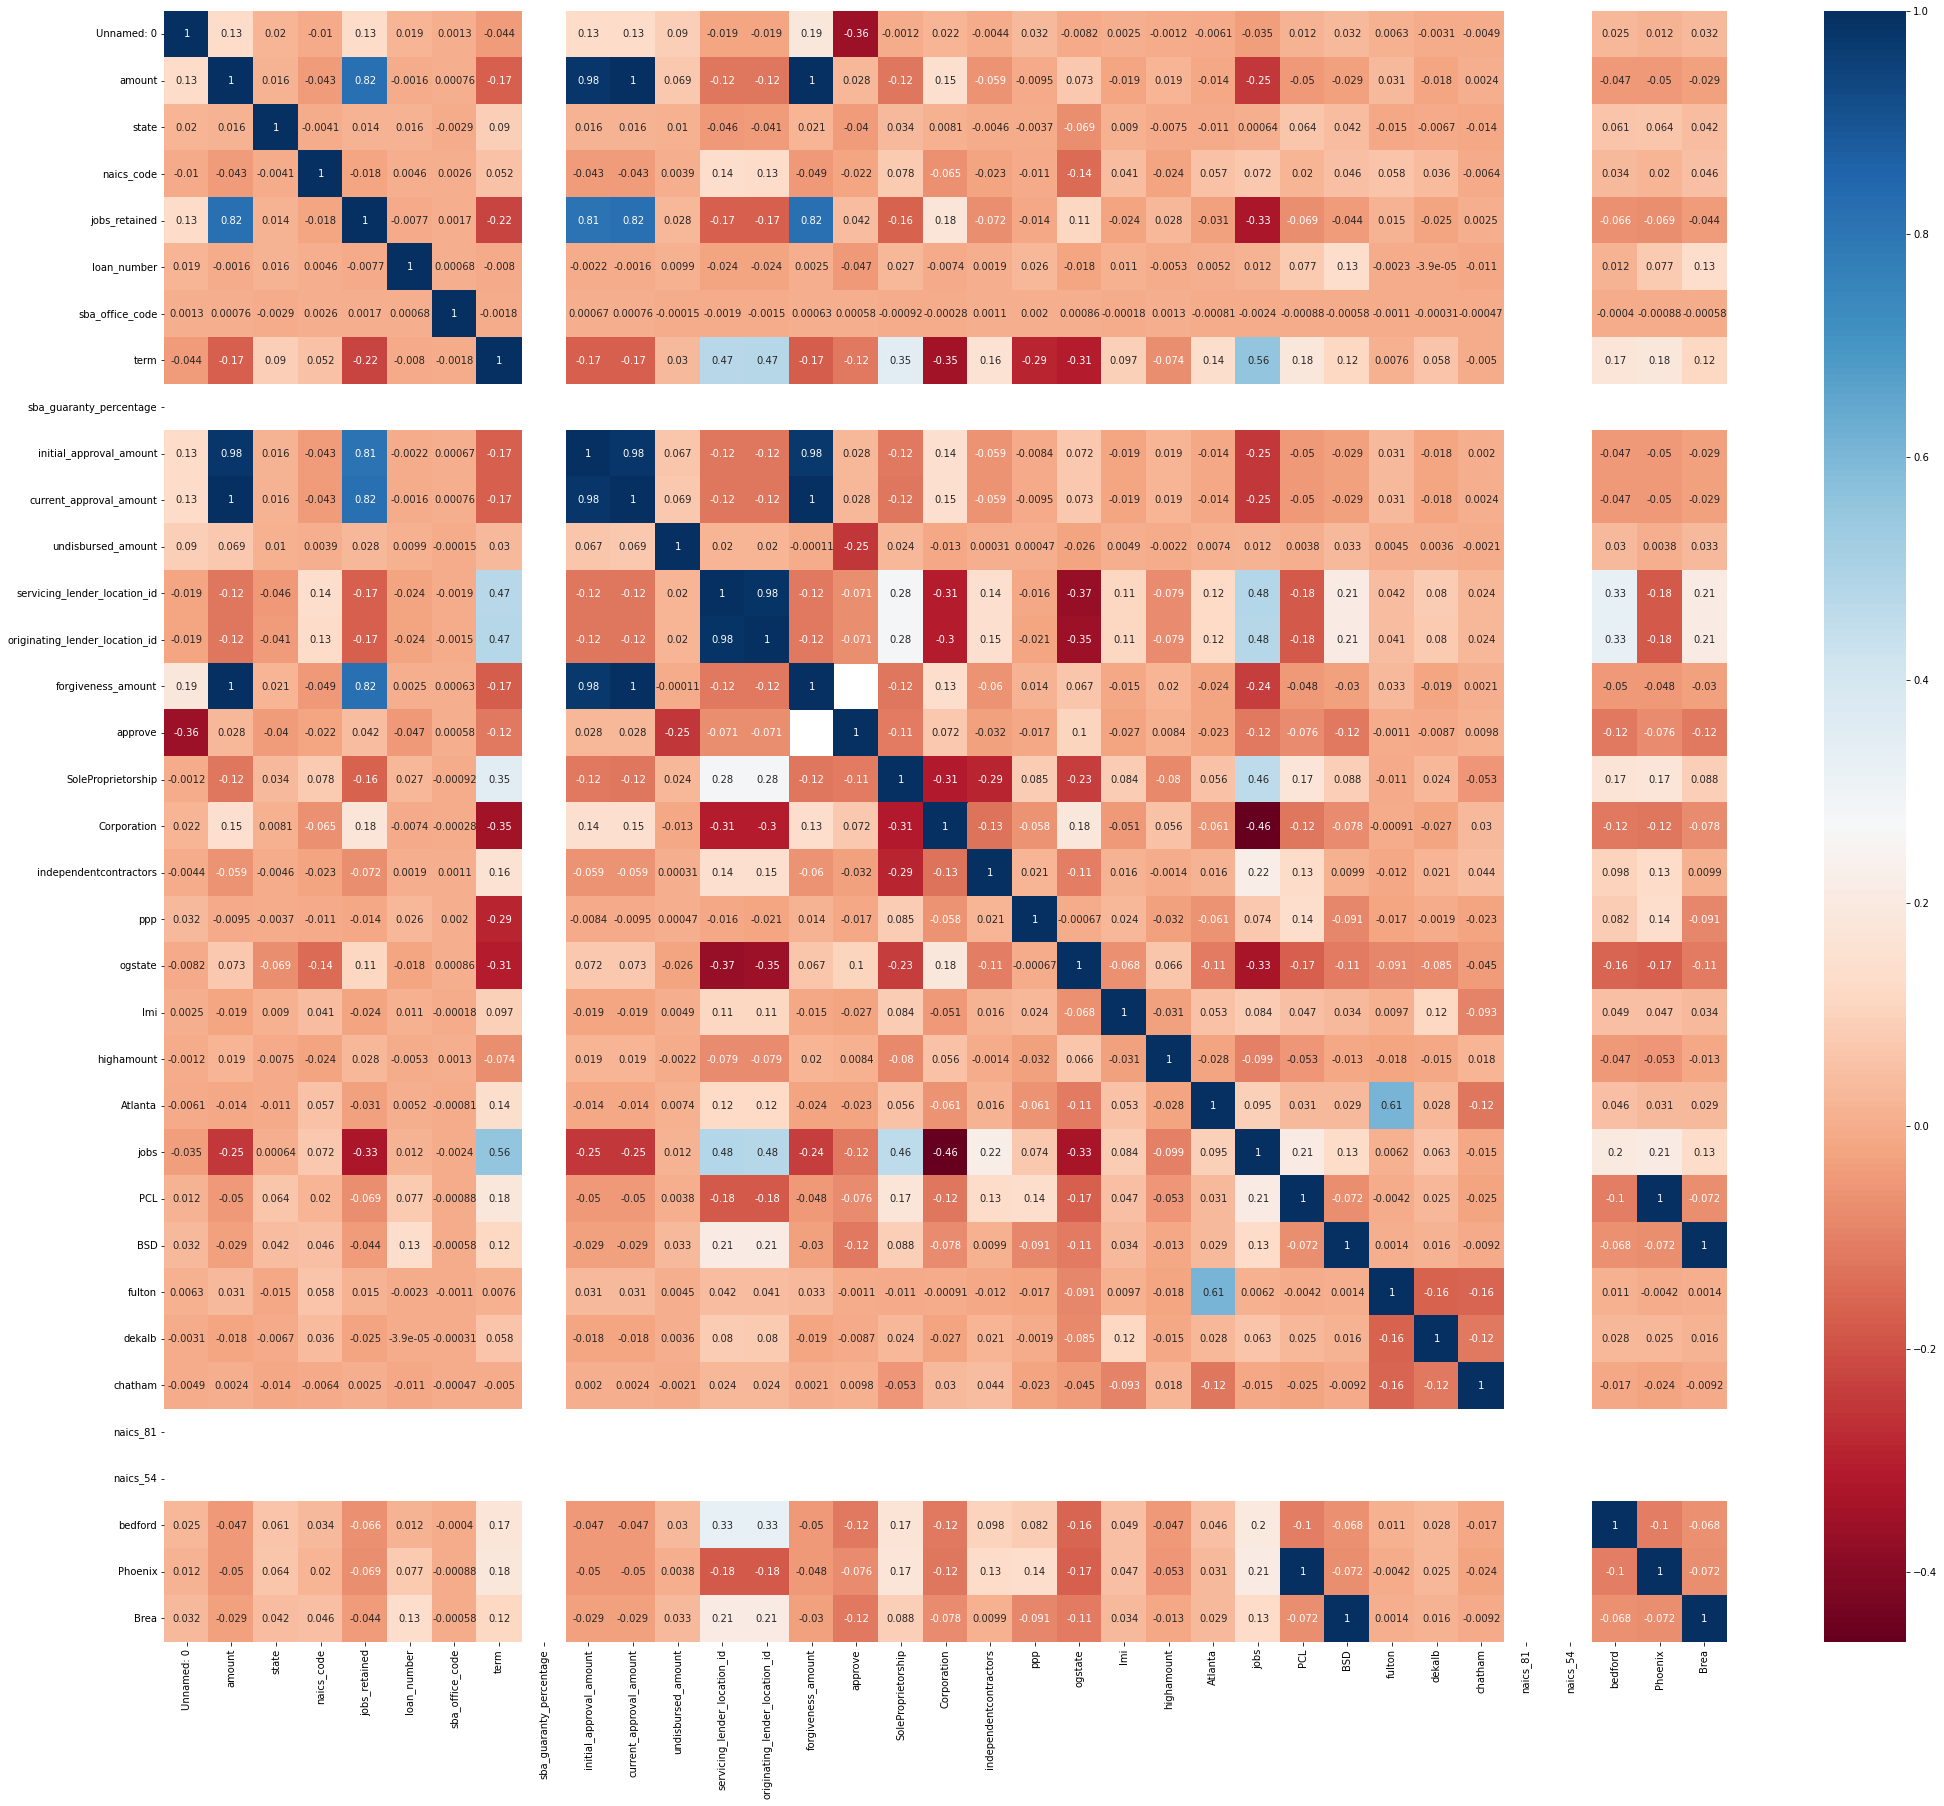

In [ ]:
plt.figure(figsize=(35,30))
sns.heatmap(data.corr(), cbar = True, annot = True, cmap='RdBu')
# Look at correlation between futureRevenue and other variables to select initial feature set
data[data.columns[1:]].corr()['approve'][:-1]

In [ ]:
# Drop the same rows dropped during EDA
dev_data = dev_data.drop(
                    dev_data[(dev_data['futureRevenue'] >= 10000.00) 
                    | (dev_data['revenue'] >= 10000.00)
                    | (dev_data['visitNumber'] >= 150) 
                    | (dev_data['productQuantityPurchased'] >= 1500)].index)

dev_data = dev_data.reset_index(drop=True)

In [ ]:
!pip install lightgbm
import lightgbm as lgb
import numpy as np
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score, r2_score, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
# Setup the data for SK Learn

# Feature matrix will include variables with largest correlations to repeatVisitor (excluding futureRevenue, which we can't use)
X = data[['amount',
'naics_code',
'loan_number',
'undisbursed_amount',
'servicing_lender_location_id',
    
]]
y = pd.Series(data.approve) # Target vector in pd.Series format



# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=123, shuffle=True)

# Instantiate XGBoost object with hyperparameters...No hyperparameter tuning is included in this example but would be beneficial
cla_model = lgb.LGBMClassifier(max_depth=5, n_estimators=100,
                           reg_alpha=0.5, reg_lambda=0,
                           objective="binary", boosting_type='gbdt',
                           random_state=123, learning_rate=0.1)
#cla_model = LogisticRegression()
#cla_model = DecisionTreeClassifier()
num = 10
acc_score=[]#
auc_score=[]#
for i in range(num):

    # Making train and test sets for both X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

    # Instantiate XGBoost object with hyperparameters...No hyperparameter tuning is included in this example but would be beneficial
    cla_model = lgb.LGBMClassifier(max_depth=5, n_estimators=100,
                               reg_alpha=0.5, reg_lambda=0,
                               objective="binary", boosting_type='gbdt',
                               random_state=123, learning_rate=0.1)

    
    # Fit the data(train the model)
    cla_model.fit(X_train, y_train)
    
    # Calculate evaluation metrics for classification model
    train_y_pred = cla_model.predict(X_train) # Predictions for training data
    train_y_true = y_train # True values for training data
    test_y_pred = cla_model.predict(X_test) # Predictions for testing data
    test_y_true = y_test # True values for testing data
    score = accuracy_score(test_y_true, test_y_pred)
    auc=roc_auc_score(test_y_true, test_y_pred)
    importance = cla_model.feature_importances_
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
    print('\n clasification report:\n', classification_report(test_y_true, test_y_pred))
    print('\n accuracy score:\n', accuracy_score(test_y_true, test_y_pred))
    print('\n confussion matrix:\n',confusion_matrix(test_y_true, test_y_pred))
    print('\n ROC AUC: \n',roc_auc_score(test_y_true, test_y_pred))
    acc_score.append(score)
    auc_score.append(auc)
print ('ACC mean:', '{0:0.8f}'.format(np.mean(acc_score)))
print ('AUC mean:', '{0:0.8f}'.format(np.mean(auc_score)))
print ('ACC std:', '{0:0.8f}'.format(np.std(acc_score)))
print ('AUC std:', '{0:0.8f}'.format(np.std(auc_score)))



Feature: 0, Score: 422.00000
Feature: 1, Score: 334.00000
Feature: 2, Score: 530.00000
Feature: 3, Score: 268.00000
Feature: 4, Score: 621.00000

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.94      7808
           1       1.00      1.00      1.00    166092

    accuracy                           1.00    173900
   macro avg       0.99      0.95      0.97    173900
weighted avg       1.00      1.00      1.00    173900


 accuracy score:
 0.9951868890166763

 confussion matrix:
 [[  7074    734]
 [   103 165989]]

 ROC AUC: 
 0.9526868571111883
Feature: 0, Score: 390.00000
Feature: 1, Score: 287.00000
Feature: 2, Score: 490.00000
Feature: 3, Score: 273.00000
Feature: 4, Score: 613.00000

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      7683
           1       1.00      1.00      1.00    166217

    accuracy                           0.9

In [ ]:
acc_score=[]
auc_score=[]
for i in range(num):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    shuffle=True)
 
  # Fit the data(train the model)
  cla_model.fit(X_train, y_train)


  # Calculate evaluation metrics for classification model
  train_y_pred = cla_model.predict(X_train) # Predictions for training data
  train_y_true = y_train # True values for training data
  test_y_pred = cla_model.predict(X_test) # Predictions for testing data
  test_y_true = y_test # True values for testing data
  score = accuracy_score(test_y_true, test_y_pred)
  AUC=roc_auc_score(test_y_true, test_y_pred)
  importance = cla_model.feature_importances_
  for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
  print('\n clasification report:\n', classification_report(test_y_true, test_y_pred))
  print('\n accuracy score:\n', accuracy_score(test_y_true, test_y_pred))
  print('\n confussion matrix:\n',confusion_matrix(test_y_true, test_y_pred))
  print('\n ROC AUC: \n',roc_auc_score(test_y_true, test_y_pred))
  print(score)
  acc_score.append(score)
  auc_score.append(AUC)
print ('ACC mean:', '{0:0.2f}'.format(np.mean(acc_score)))
print ('AUC mean:', '{0:0.2f}'.format(np.mean(auc_score)))
print ('ACC std:', '{0:0.2f}'.format(np.std(acc_score)))
print ('AUC std:', '{0:0.2f}'.format(np.std(auc_score)))

In [ ]:
# Setup the data for SK Learn

# Feature matrix will include variables with largest correlations to repeatVisitor (excluding futureRevenue, which we can't use)
X = data[['amount',
'naics_code',
'loan_number',
'undisbursed_amount',
'servicing_lender_location_id',
'originating_lender_location_id',
'forgiveness_amount',
'ppp',
'ogstate', 
'bedford'     
]]
y = pd.Series(data.approve) # Target vector in pd.Series format



# Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=123, shuffle=True)

# Instantiate XGBoost object with hyperparameters...No hyperparameter tuning is included in this example but would be beneficial
cla_model = lgb.LGBMClassifier(max_depth=5, n_estimators=100,
                           reg_alpha=0.5, reg_lambda=0,
                           objective="binary", boosting_type='gbdt',
                           random_state=123, learning_rate=0.1)
#cla_model = LogisticRegression()
#cla_model = DecisionTreeClassifier()
num = 10
for i in range(num):
  # Making train and test sets for both X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=, shuffle=True)
  # Fit the data(train the model)
  cla_model.fit(X_train, y_train)


  # Calculate evaluation metrics for classification model
  train_y_pred = cla_model.predict(X_train) # Predictions for training data
  train_y_true = y_train # True values for training data
  test_y_pred = cla_model.predict(X_test) # Predictions for testing data
  test_y_true = y_test # True values for testing data
  importance = cla_model.feature_importances_
  for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
  print('\n clasification report:\n', classification_report(test_y_true, test_y_pred))
  print('\n confussion matrix:\n',confusion_matrix(test_y_true, test_y_pred))
  print('\n ROC AUC: \n',roc_auc_score(test_y_true, test_y_pred))




Feature: 0, Score: 159.00000
Feature: 1, Score: 166.00000
Feature: 2, Score: 323.00000
Feature: 3, Score: 203.00000
Feature: 4, Score: 226.00000
Feature: 5, Score: 155.00000
Feature: 6, Score: 93.00000
Feature: 7, Score: 72.00000
Feature: 8, Score: 57.00000
Feature: 9, Score: 76.00000

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.94      7767
           1       1.00      1.00      1.00    166133

    accuracy                           1.00    173900
   macro avg       0.99      0.95      0.97    173900
weighted avg       1.00      1.00      1.00    173900


 confussion matrix:
 [[  7034    733]
 [   100 166033]]

 ROC AUC: 
 0.9525122202977984
Feature: 0, Score: 159.00000
Feature: 1, Score: 166.00000
Feature: 2, Score: 323.00000
Feature: 3, Score: 203.00000
Feature: 4, Score: 226.00000
Feature: 5, Score: 155.00000
Feature: 6, Score: 93.00000
Feature: 7, Score: 72.00000
Feature: 8, Score: 57.00000
Feature: 9, Sco